### **TASK 1.1**

In [7]:
#Basic data handling
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#Load the data
try:
    glass = pd.read_csv('glass_dataset.csv')
    print("Data loaded.")
except:
    print("Error loading data")

#Check what we've got
print("\nFirst look at the data:")
print(glass.head())

#Split into features and target
X = glass.drop('Type', axis=1) 
y = glass['Type']  

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

Data loaded.

First look at the data:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


### **TASK 1.2**


kNN
k=1 - Train Accuracy: 1.000, Test Accuracy: 0.767
k=2 - Train Accuracy: 0.819, Test Accuracy: 0.698
k=3 - Train Accuracy: 0.825, Test Accuracy: 0.814
k=4 - Train Accuracy: 0.789, Test Accuracy: 0.721
k=5 - Train Accuracy: 0.766, Test Accuracy: 0.698
k=6 - Train Accuracy: 0.749, Test Accuracy: 0.651
k=7 - Train Accuracy: 0.725, Test Accuracy: 0.721
k=8 - Train Accuracy: 0.713, Test Accuracy: 0.698
k=9 - Train Accuracy: 0.696, Test Accuracy: 0.674
k=10 - Train Accuracy: 0.708, Test Accuracy: 0.628
k=11 - Train Accuracy: 0.719, Test Accuracy: 0.628
k=12 - Train Accuracy: 0.690, Test Accuracy: 0.651
k=13 - Train Accuracy: 0.673, Test Accuracy: 0.651
k=14 - Train Accuracy: 0.696, Test Accuracy: 0.674
k=15 - Train Accuracy: 0.667, Test Accuracy: 0.698
k=16 - Train Accuracy: 0.643, Test Accuracy: 0.698
k=17 - Train Accuracy: 0.620, Test Accuracy: 0.721
k=18 - Train Accuracy: 0.626, Test Accuracy: 0.721
k=19 - Train Accuracy: 0.608, Test Accuracy: 0.721
k=20 - Train Accuracy: 0.620, Test 

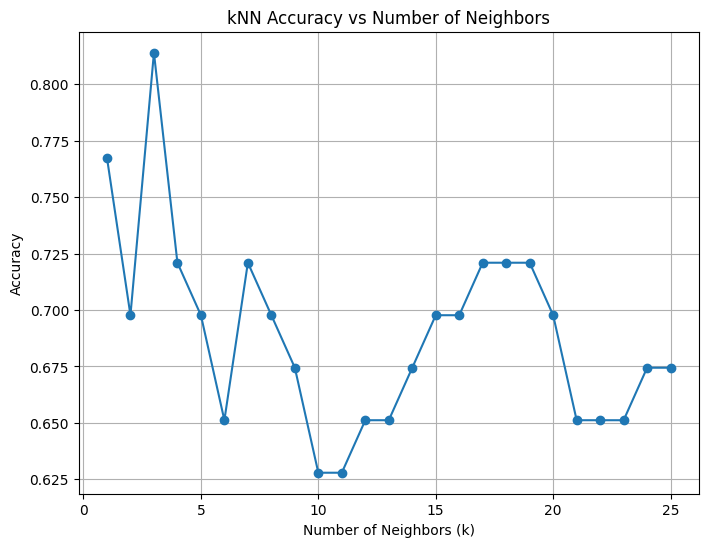


Best kNN parameters: k=3
Best kNN test accuracy: 0.814

SVM
linear kernel (degree=N/A) - Train Accuracy: 0.696, Test Accuracy: 0.698
poly kernel (degree=2) - Train Accuracy: 0.667, Test Accuracy: 0.674
poly kernel (degree=3) - Train Accuracy: 0.702, Test Accuracy: 0.674
rbf kernel (degree=N/A) - Train Accuracy: 0.778, Test Accuracy: 0.721


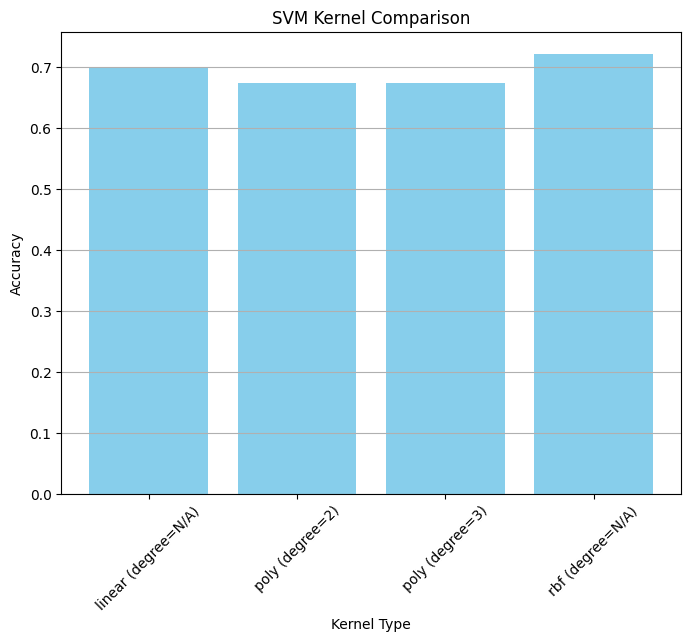

Best SVM test accuracy: 0.721

Prediction demo
Sample features:
 [ 1.51755 13.       3.6      1.36    72.99     0.57     8.4      0.
  0.11   ]
True class: 1
kNN prediction: 1
SVM prediction: 1


In [2]:
#Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=""):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"{model_name} - Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")
    return test_acc

#kNN evaluation
print("\nkNN")
best_knn = None
best_knn_score = 0
k_values = list(range(1, 26))
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    current_score = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, f"k={k}")
    knn_scores.append(current_score)
    if current_score > best_knn_score:
        best_knn_score = current_score
        best_k = k
        best_knn = knn

plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_scores, marker='o')
plt.title("kNN Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print(f"\nBest kNN parameters: k={best_k}")
print(f"Best kNN test accuracy: {best_knn_score:.3f}")

#SVM evaluation
print("\nSVM")
kernels = [
    {'kernel': 'linear', 'C': 1.0},
    {'kernel': 'poly', 'degree': 2, 'C': 1.0},
    {'kernel': 'poly', 'degree': 3, 'C': 1.0},
    {'kernel': 'rbf', 'C': 1.0}
]

best_svm = None
best_svm_score = 0
svm_scores = []
kernel_names = []


for params in kernels:
    svm = SVC(**params)
    current_score = evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test, 
                                 f"{params['kernel']} kernel (degree={params.get('degree','N/A')})")
    svm_scores.append(current_score)
    kernel_names.append(f"{params['kernel']} (degree={params.get('degree', 'N/A')})")
    if current_score > best_svm_score:
        best_svm_score = current_score
        best_svm = svm

plt.figure(figsize=(8, 6))
plt.bar(kernel_names, svm_scores, color='skyblue')
plt.title("SVM Kernel Comparison")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print(f"Best SVM test accuracy: {best_svm_score:.3f}")

#Prediction demo for SVM and kNN
sample_idx = 0
sample = X_test_scaled[sample_idx].reshape(1, -1)
print("\nPrediction demo")
print("Sample features:\n", X_test.iloc[sample_idx].values)
print("True class:", y_test.iloc[sample_idx])
print("kNN prediction:", best_knn.predict(sample)[0])
print("SVM prediction:", best_svm.predict(sample)[0])



### **TASK 1.3**


kNN 5-fold CV scores:
 [0.51428571 0.70588235 0.73529412 0.64705882 0.61764706]
Mean accuracy: 0.644 ± 0.077

SVM 5-fold CV scores:
 [0.68571429 0.64705882 0.64705882 0.73529412 0.67647059]
Mean accuracy: 0.678 ± 0.032


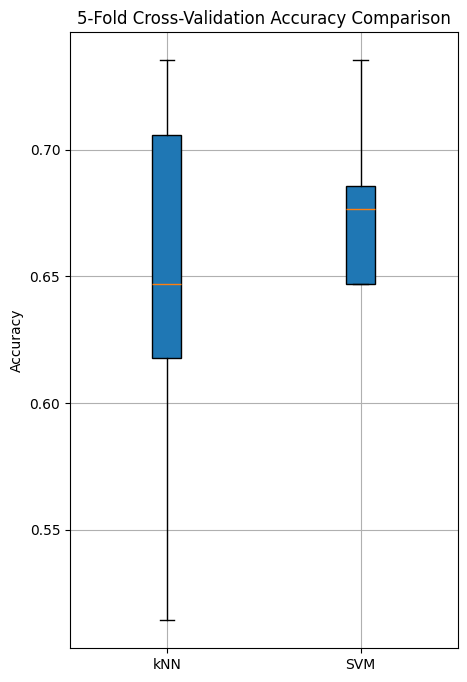

In [4]:
#kNN cross-validation
knn_cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nkNN 5-fold CV scores:\n", knn_cv_scores)
print(f"Mean accuracy: {knn_cv_scores.mean():.3f} ± {knn_cv_scores.std():.3f}")

#SVM cross-validation
svm_cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nSVM 5-fold CV scores:\n", svm_cv_scores)
print(f"Mean accuracy: {svm_cv_scores.mean():.3f} ± {svm_cv_scores.std():.3f}")

#Box plot of CV results
plt.figure(figsize=(5,8))
plt.boxplot([knn_cv_scores, svm_cv_scores], 
                 tick_labels=['kNN', 'SVM'],
                 patch_artist=True,
                 showfliers=True,
                 flierprops={'marker': 'o',
                           'markerfacecolor': 'red',
                           'markersize': 8,
                           'markeredgecolor': 'black'})


plt.title('5-Fold Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


### Glass Classification Results  

**Overview**  
kNN and SVM were evaluated using 5-fold cross-validation and tested with separate data.  

**Results**  
| Model  | Accuracy | Best Param |  
|--------|----------|------------|  
| **kNN** | 0.64     | k = 3      |  
| **SVM** | 0.68     | RBF Kernel |  


This task aimed to test kNN and SVM models for predicting glass types. Using 5-fold cross-validation, SVM achieved an accuracy of 68%, being slightly better than the kNN at 64%. Feature scaling was critical in improving accuracy for both models. Despite these improvements, due to class imbalance lead to some misclassification of rare glass types.

In conclusion, while SVM performed better overall, rare class classification remains a significant issue. Future testing should focus more on improving data balance and exploring alternative models to enhance reliability.


### **TASK 2.1**

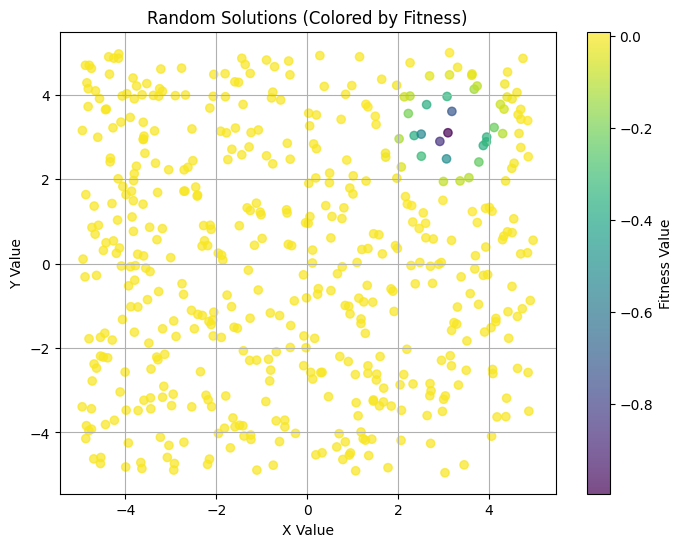

In [5]:
#Setting random seed
np.random.seed(42)

#Generate random solutions
num_solutions = 500
d = 2
solutions = np.random.uniform(low=-5, high=5, size=(num_solutions, d))

#Easom function
def easom(x, y):
    return -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2 + (y-np.pi)**2))

#Calculate fitness for solutions
fitness_values = np.array([easom(sol[0], sol[1]) for sol in solutions])

#Plotting solutions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(solutions[:, 0], solutions[:, 1], 
                     c=fitness_values,
                     cmap='viridis',
                     alpha=0.7)

#Adding colour bar and lables
plt.colorbar(scatter, label='Fitness Value')
plt.title('Random Solutions (Colored by Fitness)')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.grid(True)

plt.show()

### **TASK 2.2**

In [ ]:
#Uniform Crossover
def uniform_crossover(parent1, parent2):
    child = np.where(np.random.rand(parent1.shape[0]) < 0.5, parent1, parent2)
    return child

#Gaussian mutation + noise
def gaussian_mutation(individual, mutation_rate=0.1):
    noise = np.random.normal(0, mutation_rate, size=individual.shape)
    mutated = individual + noise
    return mutated

#Evolutionary algorithm
def evolutionary_algorithm(easom_func, num_generations, solutions, fitness_values, mutation_rate):
    population = solutions.copy()
    fitness = fitness_values.copy()
    fitness_history = []


    for gen in range(num_generations):
        #Selecting parents
        sorted_indices = np.argsort(fitness)
        parents = population[sorted_indices[:population.shape[0] // 2]]

        #Creating offspring using uniform crossover and gaussian mutation
        offspring = []
        for i in range(population.shape[0] // 2): 
            parent1, parent2 = parents[np.random.choice(parents.shape[0], size=2, replace=False)]
            child = uniform_crossover(parent1, parent2)  
            child = gaussian_mutation(child, mutation_rate) 
            offspring.append(child)
        offspring = np.array(offspring)

        #Combine parent and offspring populations
        population = np.vstack((parents, offspring))
        fitness = np.array([easom_func(ind[0], ind[1]) for ind in population])

        #Record average fitness
        fitness_history.append(np.mean(fitness))

    return population, fitness, fitness_history

#Run the evolutionary algorithm using Task 2.1 solutions
population, final_fitness, fitness_history = evolutionary_algorithm(
    easom_func=easom,
    num_generations=100,
    solutions=solutions,  
    fitness_values=fitness_values,  
    mutation_rate=0.1
)


### **TASK 2.3**

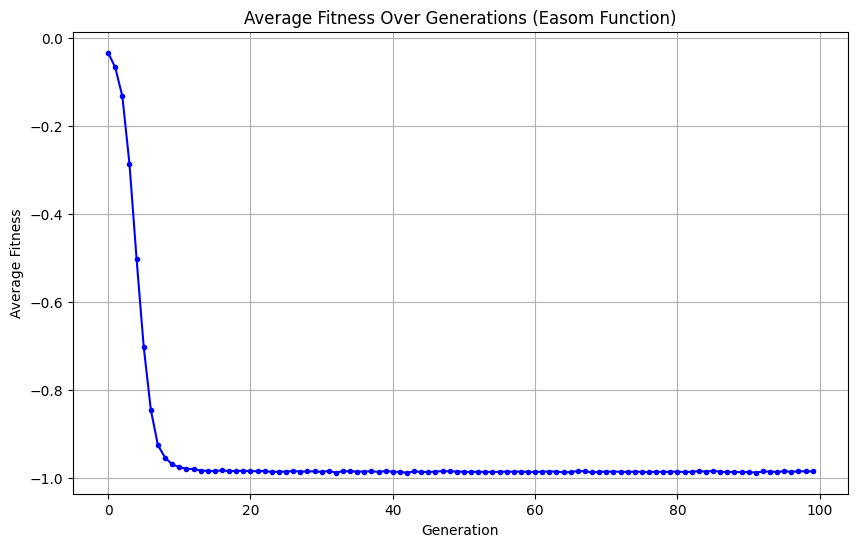

In [8]:
#Plot for average fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, marker='.', linestyle='-', color='blue')
plt.title('Average Fitness Over Generations (Easom Function)')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.grid(True)
plt.show()


### Summary of the Code  

The code uses an evolutionary algorithm (EA) to optimize the Easom function, focusing on refining solutions over generations. For Task 2.2, the algorithm employs three main processes: crossover to combine parent solutions, mutation to introduce small random changes for exploration, and selection to retain the best-performing solutions while replacing weaker ones. This process runs for 100 generations, iteratively improving solution quality.

For Task 2.3, the algorithm tracks the average fitness at each generation, enabling the visualization of progress over time. This demonstrates how the solutions converge toward optimal fitness as the algorithm evolves. In my eyes, the optimal fitness is reached around the 17th generation and doesn't change much after.
